In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
data = pd.read_csv('test.csv', index_col=0)

data = data[data['Gen'] > 499]

data

,Rep,Sch,Gen,Emissions,B0,R0,P0,B1,R1,P1
500,0,0,500,777,0,0,0,0,0,0
501,0,0,501,463,0,0,0,0,0,0
502,0,0,502,587,0,0,0,0,0,0
503,0,0,503,430,0,0,0,0,0,0
504,0,0,504,973,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2254995,9,10,20495,645,0,0,0,0,0,0
2254996,9,10,20496,557,0,0,0,0,0,0
2254997,9,10,20497,684,0,0,0,0,0,0
2254998,9,10,20498,647,0,0,0,0,0,0


In [8]:
analysis_dict = {
    "Rep": [],
    "Sch": [],
    "R0": [],
    "B0": [],
    "R1": [],
    "B1": [],
}

for rep in data['Rep'].unique():
    for sch in data['Sch'].unique():
        subset = data[(data['Rep'] == rep) & (data['Sch'] == sch)]

        gens = subset.shape[0]
        bins = gens // 500

        analysis_dict['Rep'].append(rep)
        analysis_dict['Sch'].append(sch)
        analysis_dict['R0'].append(subset['R0'].sum()/bins)
        analysis_dict['B0'].append(subset['B0'].sum()/bins)
        analysis_dict['R1'].append(subset['R1'].sum()/bins)
        analysis_dict['B1'].append(subset['B1'].sum()/bins)


analysis_df = pd.DataFrame(analysis_dict)

analysis_df['log(B0/B1)'] = np.log10(analysis_df['B0']/analysis_df['B1'])
analysis_df['log(R0/R1)'] = np.log10(analysis_df['R0']/analysis_df['R1'])

analysis_df


,Rep,Sch,R0,B0,R1,B1,log(B0/B1),log(R0/R1)
0,0,0,13.700,91.025,2.225,25.050,0.560353,0.789391
1,0,1,9.525,75.375,2.500,26.500,0.453981,0.580925
2,0,2,8.025,68.275,2.825,28.300,0.382475,0.453427
3,0,3,6.375,54.075,3.225,34.025,0.201198,0.295950
4,0,4,5.575,59.875,3.175,29.900,0.301574,0.244501
...,...,...,...,...,...,...,...,...
105,9,6,3.625,34.825,5.500,55.000,-0.198472,-0.181055
106,9,7,2.725,26.850,6.275,55.700,-0.316911,-0.362247
107,9,8,2.650,29.325,7.650,66.025,-0.352470,-0.460416
108,9,9,1.925,17.650,11.425,91.325,-0.713845,-0.773425


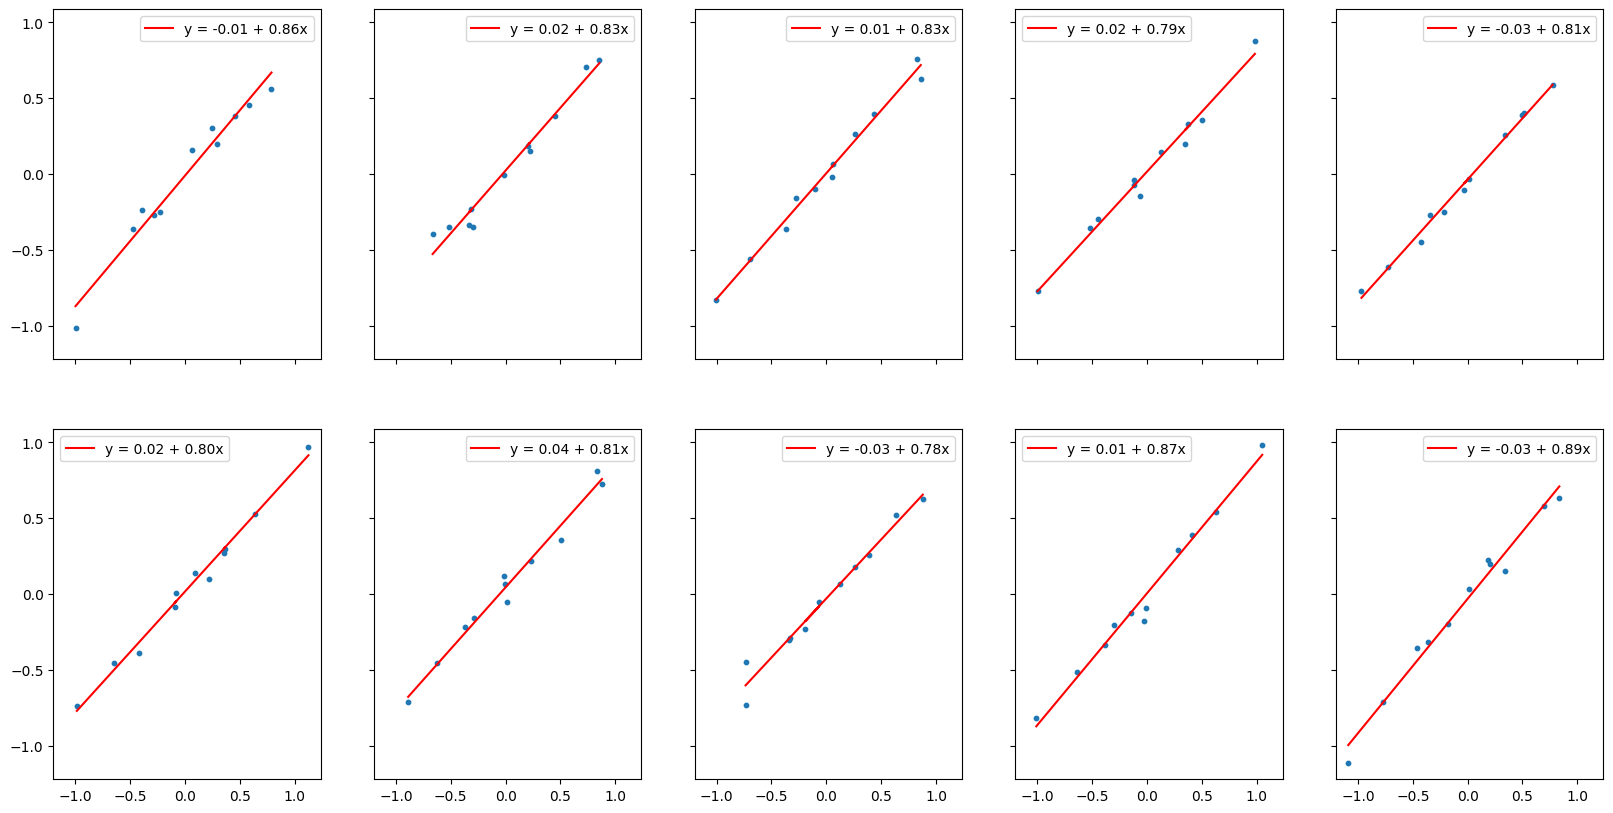

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharey=True, sharex=True)

for i, ax in enumerate(axs.flatten()):
    subset = analysis_df[analysis_df['Rep'] == i]
    x = subset['log(R0/R1)']
    y = subset['log(B0/B1)']

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    ax.scatter(x, y, s=10)
    ax.plot(x, intercept + slope*x, 'r', label=f'y = {intercept:.2f} + {slope:.2f}x')
    ax.legend()

plt.show()
